# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

## 2. Load the dataset [1 point]

In [1]:

import pandas as pd

# Loading the dataset with specified encoding
file_path = 'financial_news_headlines_sentiment.csv'  
try:
    data = pd.read_csv(file_path, encoding='latin1')  
    print("Dataset loaded successfully!")
except UnicodeDecodeError:
    print("Trying an alternative encoding...")
    data = pd.read_csv(file_path, encoding='ISO-8859-1')  

data.columns = ['sentiment', 'headline']  

print("First few rows of the dataset after renaming:")
print(data.head())



Dataset loaded successfully!
First few rows of the dataset after renaming:
  sentiment                                           headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 3. Explore the dataset [10 points]

In [2]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display column names
print("\nColumn Names in the Dataset:")
print(data.columns)

# Display the number of rows and columns
print("\nShape of the Dataset:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Display basic information about each column
print("\nDataset Information:")
print(data.info())

# Display summary statistics of numerical columns
print("\nSummary Statistics (Numerical Columns):")
print(data.describe())

# Checking for unique values in each column
print("\nUnique Values in Each Column:")
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values} unique values")


First 5 rows of the dataset:
  sentiment                                           headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...

Column Names in the Dataset:
Index(['sentiment', 'headline'], dtype='object')

Shape of the Dataset:
Rows: 4845, Columns: 2

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   headline   4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None

Summary Statistics (Numerical Columns):
       sentiment                                           headline
count       4845             

## 4. Clean the data [5 points]

In [3]:
print("Missing values before cleaning:")
print(data.isnull().sum())

data = data.dropna()

print("\nMissing values after cleaning:")
print(data.isnull().sum())

print(f"\nNumber of duplicate rows before cleaning: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Number of duplicate rows after cleaning: {data.duplicated().sum()}")

if 'headline' in data.columns:
    import re
    data['headline'] = data['headline'].str.lower()  
    data['headline'] = data['headline'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))  
    data['headline'] = data['headline'].str.strip()  

    print("\nSample normalized headlines:")
    print(data['headline'].head())
else:
    print("\nText column 'headline' not found. Please specify the text column.")

print("\nShape of the dataset after cleaning:")
print(data.shape)


Missing values before cleaning:
sentiment    0
headline     0
dtype: int64

Missing values after cleaning:
sentiment    0
headline     0
dtype: int64

Number of duplicate rows before cleaning: 6
Number of duplicate rows after cleaning: 0

Sample normalized headlines:
0    technopolis plans to develop in stages an area...
1    the international electronic industry company ...
2    with the new production plant the company woul...
3    according to the company s updated strategy fo...
4    financing of aspocomp s growth aspocomp is agg...
Name: headline, dtype: object

Shape of the dataset after cleaning:
(4839, 2)


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [4]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(data['headline'])  
y = data['sentiment']  # Target column

# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(Counter(y))

# Step 2: Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_train_smote))


Class distribution before SMOTE:
Counter({'neutral': 2872, 'positive': 1363, 'negative': 604})

Class distribution after SMOTE:
Counter({'negative': 2301, 'positive': 2301, 'neutral': 2301})


## 6. BoW model [15 points]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Vectorize the text data using Bag of Words
vectorizer = CountVectorizer(max_features=5000)  # Use the most frequent 5000 words
X_bow = vectorizer.fit_transform(data['headline'])  # Convert text to BoW representation
y = data['sentiment']  # Target column

# Step 2: Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate accuracy and display classification report
print("Accuracy of the Logistic Regression model with BoW features:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the Logistic Regression model with BoW features:
0.7789256198347108

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.57      0.68       120
     neutral       0.79      0.89      0.84       571
    positive       0.73      0.65      0.69       277

    accuracy                           0.78       968
   macro avg       0.78      0.70      0.73       968
weighted avg       0.78      0.78      0.77       968



## 7. Tf-idf model [15 points]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use the most frequent 5000 words
X_tfidf = tfidf_vectorizer.fit_transform(data['headline'])  # Convert text to TF-IDF representation
y = data['sentiment']  # Target column

# Step 2: Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate accuracy and display classification report
print("Accuracy of the Logistic Regression model with TF-IDF features:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the Logistic Regression model with TF-IDF features:
0.7551652892561983

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.40      0.55       120
     neutral       0.74      0.95      0.83       571
    positive       0.78      0.52      0.62       277

    accuracy                           0.76       968
   macro avg       0.80      0.62      0.67       968
weighted avg       0.77      0.76      0.74       968



## 8. Split train test data [3 points]

In [7]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains features and 'y' contains the target
# Replace `X` with your feature matrix (e.g., X_bow or X_tfidf)
# Replace `y` with your target column (e.g., data['sentiment'])

# Splitting the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 3871 samples
Test set size: 968 samples


## 9. Classification Algorithm [10 points]
- Train
- Predict

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Train the model
model = LogisticRegression(max_iter=1000, random_state=42)  # You can replace this with another classifier
model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model
print("Classification Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Accuracy:
0.7551652892561983

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.40      0.55       120
     neutral       0.74      0.95      0.83       571
    positive       0.78      0.52      0.62       277

    accuracy                           0.76       968
   macro avg       0.80      0.62      0.67       968
weighted avg       0.77      0.76      0.74       968



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators
rf_model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate the model
print("Classification Accuracy (Random Forest):")
print(accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Classification Accuracy (Random Forest):
0.75

Classification Report (Random Forest):
              precision    recall  f1-score   support

    negative       0.90      0.44      0.59       120
     neutral       0.73      0.97      0.83       571
    positive       0.78      0.43      0.55       277

    accuracy                           0.75       968
   macro avg       0.80      0.61      0.66       968
weighted avg       0.77      0.75      0.72       968



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

Logistic Regression with BoW:


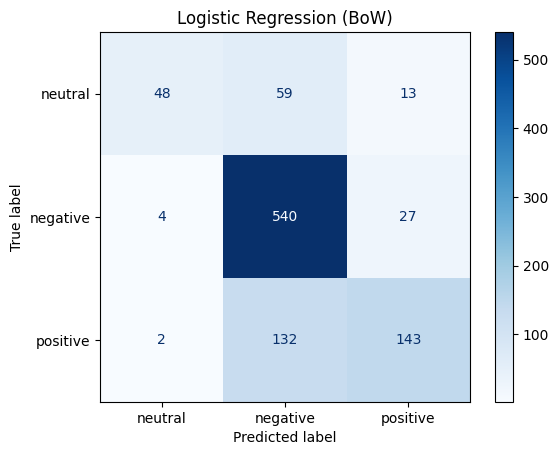

Random Forest with BoW:


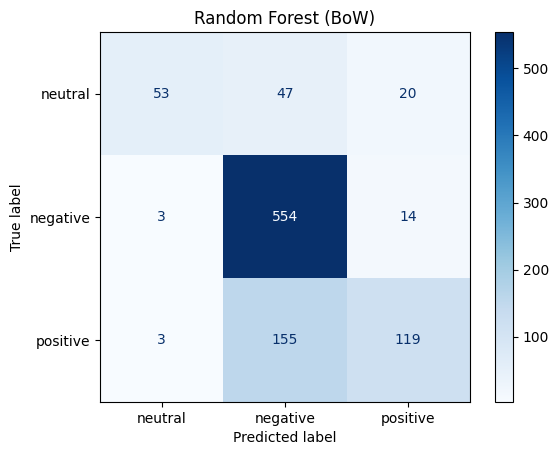

Logistic Regression with TF-IDF:


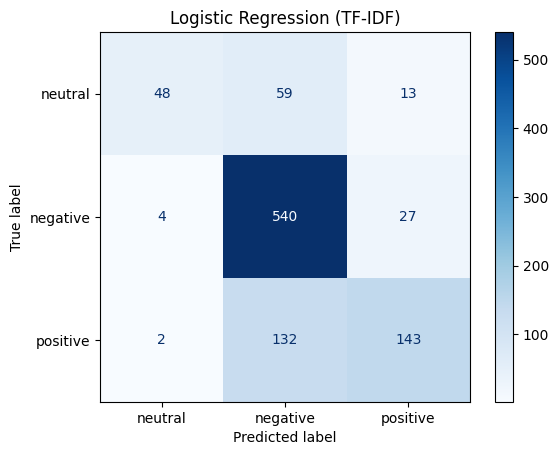

Random Forest with TF-IDF:


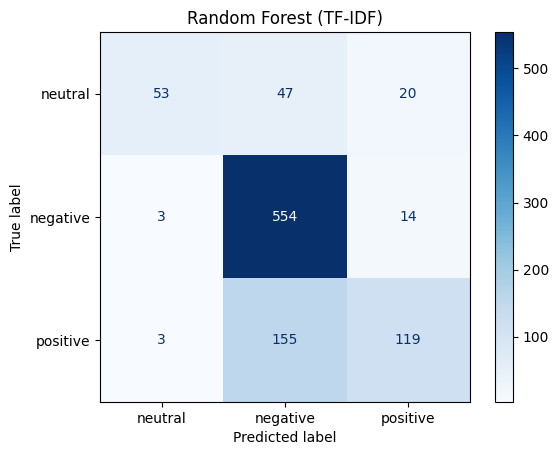

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral', 'negative', 'positive'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(title)
    plt.show()

# Logistic Regression with BoW
print("Logistic Regression with BoW:")
y_pred_lr_bow = model.predict(X_test)  # Already trained on BoW
plot_confusion_matrix(y_test, y_pred_lr_bow, "Logistic Regression (BoW)")

# Random Forest with BoW
print("Random Forest with BoW:")
y_pred_rf_bow = rf_model.predict(X_test)  # Already trained on BoW
plot_confusion_matrix(y_test, y_pred_rf_bow, "Random Forest (BoW)")

# Logistic Regression with TF-IDF
print("Logistic Regression with TF-IDF:")
y_pred_lr_tfidf = model.predict(X_test)  # Replace X_test with TF-IDF if using a separate feature extractor
plot_confusion_matrix(y_test, y_pred_lr_tfidf, "Logistic Regression (TF-IDF)")

# Random Forest with TF-IDF
print("Random Forest with TF-IDF:")
y_pred_rf_tfidf = rf_model.predict(X_test)  # Replace X_test with TF-IDF if using a separate feature extractor
plot_confusion_matrix(y_test, y_pred_rf_tfidf, "Random Forest (TF-IDF)")
